In [89]:
# import necessary packages:
import pandas as pd
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from __future__ import division

In [103]:
# define the indicators:
def moving_average(x,N): 
    """ return moving average from last N samples: """ 
    SMA = 0
    for i in range(N):
        SMA = SMA + (1/N)*x[-i-1]
    return SMA

def exponential_weighted_moving_average(x,N,alpha): 
    """ return exponential weighted moving average from last N samples: """ 
    EWMA = 0
    s = [x[-1]]
    for i in range(N):
        if i == 0:
            s_i = x[-1]
        else:
            s_i = alpha*x[-i-1] + (1 - alpha)*s[i-1]
        EWMA = EWMA + (1/N)*s_i
        s.append(s_i)
    return EWMA

def relative_strength_index(x,N,alpha):
    """ return relative strength index from the last N samples: """
    ups = np.zeros((N,1))
    downs = np.zeros((N,1))
    for ind in range(N):
        if x[-1-ind] > x[-1-ind-1]:
            ups[ind,0] = x[-1-ind] - x[-1-ind-1]
        if x[-1-ind] < x[-1-ind-1]:
            downs[ind,0] = x[-1-ind-1] - x[-1-ind]
    
    EWMA_ups = 0
    s = [ups[-1]]
    for i in range(N):
        if i == 0:
            s_i = s[-1]
        else:
            s_i = alpha*ups[-i-1] + (1 - alpha)*s[i-1]
        EWMA_ups = EWMA_ups + (1/N)*s_i
        s.append(s_i)
        
    EWMA_downs = 0
    s = [downs[-1]]
    for i in range(N):
        if i == 0:
            s_i = downs[-1]
        else:
            s_i = alpha*downs[-i-1] + (1 - alpha)*s[i-1]
        EWMA_downs = EWMA_downs + (1/N)*s_i
        s.append(s_i)
    
    RS = EWMA_ups/EWMA_downs
    RSI = 100 - (100/(1 + RS))
    return RSI

def Bollinger_bands(x,N,alpha,K):
    """ return Bollinger bands: """ 
    # SMA = 0
    # for i in range(N):
    #    SMA = SMA + (1/N)*x[-i-1]
    SMA = np.mean(x[-N:-1])   
    upper_band = SMA + K*np.std(x[-N:-1])   
    lower_band = SMA - K*np.std(x[-N:-1])   
    return SMA, upper_band, lower_band
    

In [91]:
# load the data:
df     = pd.read_csv('100307_restingstate_day1.csv')
data   = df.values
Nvars  = data.shape[1]
labels_Glasser  = pd.read_csv("labels_Glasser.csv",header=None)[0].tolist()
TR     = 0.72 #[s]

In [92]:
# select one time series:
ROI_number = 0
x = data[:,ROI_number]
ROI_name = labels_Glasser[ROI_number]
N = len(x)

In [111]:
# calculate the indicators:
# simple moving average:
N_SMA = 14
SMAvec = np.zeros((N - N_SMA,1))
for ind in range(len(SMAvec)):
    SMAvec[ind] = moving_average(x[:-1-ind],N_SMA)
    
# exponential weighted moving average:    
N_EWMA = 14
alpha = 0.2
EWMAvec = np.zeros((N - N_EWMA,1))
for ind in range(len(EWMAvec)):
    EWMAvec[ind] = exponential_weighted_moving_average(x[:-1-ind],N_SMA,alpha)

# MACD:
alpha = 0.2
N_EWMA1 = 12
EWMAvec1 = np.zeros((N - N_EWMA1,1))
for ind in range(len(EWMAvec1)):
    EWMAvec1[ind] = exponential_weighted_moving_average(x[:-1-ind],N_EWMA1,alpha)
N_EWMA2 = 26
EWMAvec2 = np.zeros((N - N_EWMA2,1))
for ind in range(len(EWMAvec2)):
    EWMAvec2[ind] = exponential_weighted_moving_average(x[:-1-ind],N_EWMA2,alpha)
    
# RSI:
alpha = 0.2
N_RSI = 14
RSIvec = np.zeros((N - N_RSI - 1,1))
for ind in range(len(RSIvec)):
    RSIvec[ind] = relative_strength_index(x[:-1-ind],N_RSI,alpha)
    
# Bollinger bands:
K = 1.0
alpha = 0.2
N_BOLL = 14
BOLLvec_ma = np.zeros((N - N_BOLL,1))
BOLLvec_upper = np.zeros((N - N_BOLL,1))
BOLLvec_lower = np.zeros((N - N_BOLL,1))
for ind in range(len(BOLLvec)):
    Boll = Bollinger_bands(x[:-1-ind],N_BOLL,alpha,K)
    BOLLvec_ma[ind] = Boll[0]
    BOLLvec_upper[ind] = Boll[1]
    BOLLvec_lower[ind] = Boll[2]

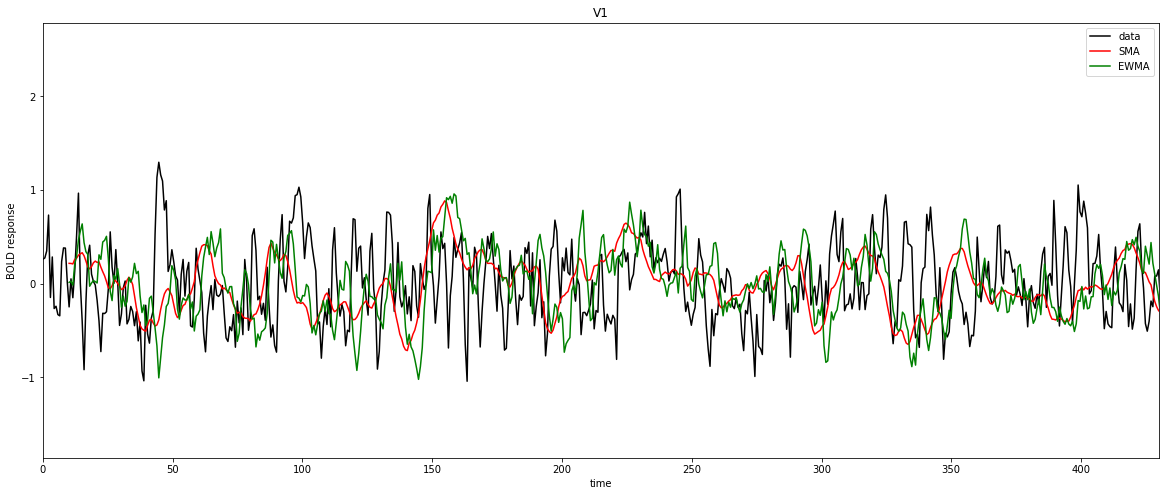

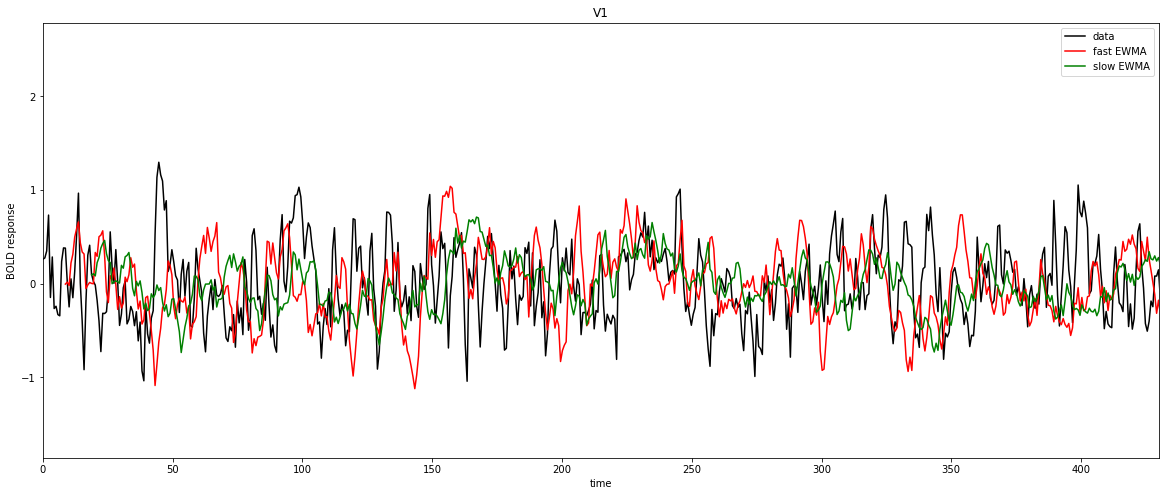

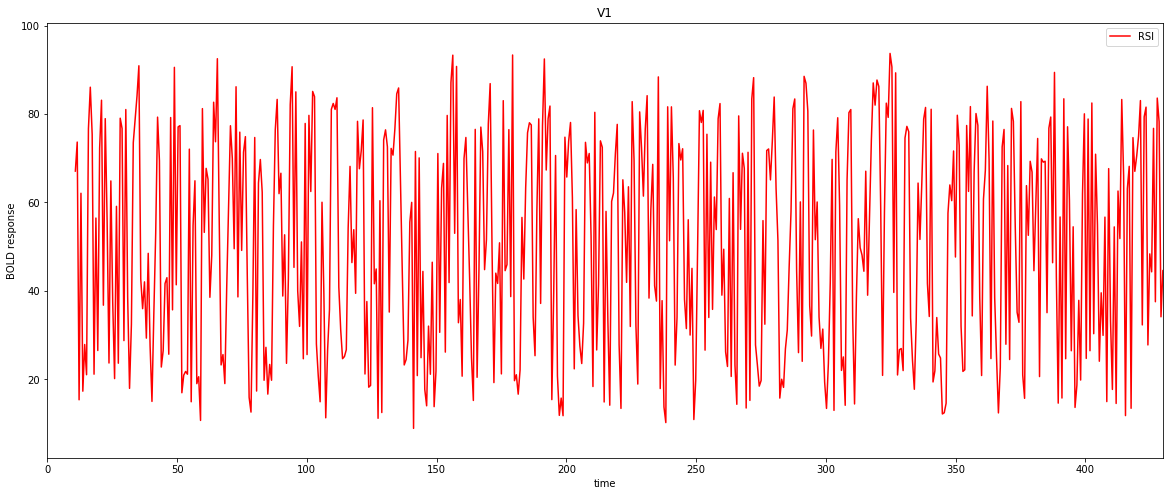

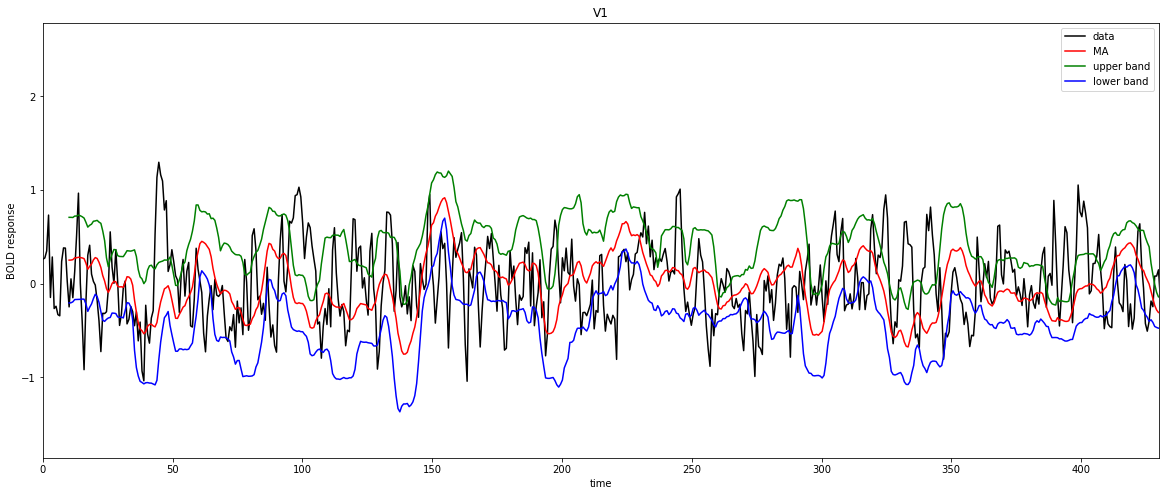

In [112]:
# plot simple and exponential moving average:
plt.figure(figsize=(20,8))
plt.plot(np.arange(N)*TR, x, color='k', label='data')
plt.plot(np.arange(N)[N_SMA:]*TR, SMAvec, color='r', label='SMA')
plt.plot(np.arange(N)[N_EWMA:]*TR, EWMAvec, color='g', label='EWMA')
plt.legend()
plt.xlabel('time')
plt.ylabel('BOLD response')
plt.xlim([0, N*TR*0.25]) #zoom inot first 25% of the chart
plt.title(ROI_name)
plt.show()

# plot MACD:
plt.figure(figsize=(20,8))
plt.plot(np.arange(N)*TR, x, color='k', label='data')
plt.plot(np.arange(N)[N_EWMA1:]*TR, EWMAvec1, color='r', label='fast EWMA')
plt.plot(np.arange(N)[N_EWMA2:]*TR, EWMAvec2, color='g', label='slow EWMA')
plt.legend()
plt.xlabel('time')
plt.ylabel('BOLD response')
plt.xlim([0, N*TR*0.25]) #zoom inot first 25% of the chart
plt.title(ROI_name)
plt.show()

# plot RSI:
plt.figure(figsize=(20,8))
#plt.plot(np.arange(N)*TR, x, color='k', label='data')
plt.plot(np.arange(N)[N_RSI+1:]*TR, RSIvec, color='r', label='RSI')
plt.legend()
plt.xlabel('time')
plt.ylabel('BOLD response')
plt.xlim([0, N*TR*0.25]) #zoom inot first 25% of the chart
plt.title(ROI_name)
plt.show()

# plot Bollinger bands:
plt.figure(figsize=(20,8))
plt.plot(np.arange(N)*TR, x, color='k', label='data')
plt.plot(np.arange(N)[N_BOLL:]*TR, BOLLvec_ma, color='r', label='MA')
plt.plot(np.arange(N)[N_BOLL:]*TR, BOLLvec_upper, color='g', label='upper band')
plt.plot(np.arange(N)[N_BOLL:]*TR, BOLLvec_lower, color='b', label='lower band')
plt.legend()
plt.xlabel('time')
plt.ylabel('BOLD response')
plt.xlim([0, N*TR*0.25]) #zoom inot first 25% of the chart
plt.title(ROI_name)
plt.show()